# Tarea 3.  Cadenas de Markov y procesos de Markov


En esta tarea se ejercitarán los temas relacionados con las cadenas de Markov y los procesos de Markov. La tarea consiste en realizar los ejercicios incluídos en esta jupyter notebook y entregarlos completos. 

Comenzamos leyendo las diferentes librerías que se utilizarán para la tarea. Ejecute el siguiente script. 

In [3]:
%matplotlib inline

import numpy as np
import pylab as plt
import matplotlib.cm as cm
import matplotlib
from PIL import Image as im
import math
import time 
#import networkx as nx
#import pandas as pd 

import mdptoolbox
import mdptoolbox.example

from IPython.display import display
from IPython.display import Image



## Definición del problema
  
    

Considere el siguiente problema de modelado.

Un vigilante de un museo debe recorrer continuamente un conjunto de 5 salas. La vigilancia comienza en la sala 1 y en cada unidad de tiempo t el vigilante puede dirigirse a otras salas o mantenerse en la actual con las siguientes probabilidades:

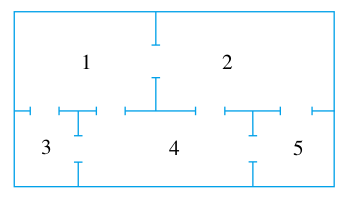

In [3]:
Image(filename='Short_Maze_Figure.png') 

La probabilidad de ir de la sala 1 a la 2 es 1.

La probabilidad de ir de la sala 2 a la 5 es 1.

La probabilidad de ir de la sala 5 a la 4 es 1.

La probabilidad de ir de la sala 4 a la 3 es p y la probabilidad de permanecer una unidad de tiempo en la sala 4 es (1-p).

La probabilidad de ir de la sala 3 a la 1 es 1. 

 

## Ejercicio 1

Modele el problema anterior como una cadena de Markov y determine:

1. Cuál es la matrix de transición de la cadena?

2. Determine si existe una distribución límite justificando su existencia o no.

3. En caso de existir halle la distribución límite.

In [105]:
%%%latex
1) Matrix de transición de la cadena: 
    \[
        \]
    
    
    \[
    P =\left\{
                \begin{array}{ccc}
                   0 & 1 & 0 & 0 & 0 \\
                   0 & 0 & 0 & 0 & 1 \\
                   1 & 0 & 0 & 0 & 0 \\
                   0 & 0 & p & 1-p & 0 \\
                   0 & 0 & 0 & 1 & 0 \\
                   
        \end{array}
              \right.
  \]
         
            \[
        \]
2) Para valores de p diferentes a 0 y 1 nuestra matriz de transición es indivisible y aperiódica, ya que todos los estados están comunicados entre sí, y se puede alcanzar cualquier estado partiendo de este mismo con diferentes periodos de tiempo.
\[
\]
        Si p=0, todos los estados dejan de estar conectados entre sí, teniendo en el estado 4 un estado absorvente.
\[
\]
        Si p=1, tenemos una matriz indivisible y periódica, por lo cual no existe una distribución límite.
                    \[
        \]
        
3) La distribución límite se calcula de la siguiente manera:
            \[
        \]
    
    
    \[
    \left\{
                \begin{array}{ccc}
                   π_{0}=π_{2} \\
                   π_{1}=π_{0} \\
                   π_{2}=p·π_{3} \\
                   π_{3}=(1-p)·π_{3}+π_{4} \\
                   π_{4}=π_{1} \\
                   π_{0}+π_{1}+π_{2}+π_{3}+π_{4}=1\\
                   
        \end{array}
              \right.
  \]
            \[
        \]
Podemos dejarlo todo en función de π3:
                \[
        \]
        
        \[\left\{
                \begin{array}{ccc}
                   4p·π_{3}+(1-p)·π_{3}+p·π_{3}=(4p+1)·π_{3}=1 \\
                   π_{0}=π1=π2=π4=p/(4p+1) \\
                   π_{3}=1/(4p+1) \\

                   
                   
        \end{array}
              \right.\]
            \[
        \]
En la siguiente celda creamos una función para dada una p, de manera que 0<p<1, y un número de iteraciones, verifique que existe una distribución límite, y nos muestre dicha distribución.
        
        

<IPython.core.display.Latex object>

In [27]:
#Definimos una función que dado un valor de p y un número de iteraciones nos muestra la matriz
def limit(N,p):
    if p>1 or p<=0:
        print('p debe ser un valor entre 0 y 1 y ≠{0,1}')        
    else:
        print('p =',p)
        T=np.array([[0,1,0,0,0],[0,0,0,0,1],[1,0,0,0,0],[0,0,p,1-p,0],[0,0,0,1,0]])
        T1=T.copy()
        for i in range(N+10000): #Sumamos 100 como valor alto para garantizar que converja 
            T1=np.dot(T1,T)
        T2=T.copy()
        for i in range(N+20000): #Sumamos 200 como valor más alto para después compararlo con el de 100 y verificar que ha convergido
            T2=np.dot(T2,T)
        if np.array_equal(T1,T2):
            print('Existe una distribución límite y es:')
            print(T1)
        else:
            print('No existe una distribución límite')
            print(T1,T2)
    
limit(10,1)

p = 1
Existe una distribución límite y es:
[[0 1 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]]


In [68]:
#Definimos una función que dado un valor de p y un número de iteraciones nos muestra la matriz
def limit(N,p):
    if p>=1 or p<=0:
        print('p debe ser un valor entre 0 y 1 y ≠{0,1}')        
    else:
        print('p =',p)
        T=np.array([[0,1,0,0,0],[0,0,0,0,1],[1,0,0,0,0],[0,0,p,1-p,0],[0,0,0,1,0]])
        T1=T.copy()
        for i in range(N): 
            Tprev = T1.copy()
            T1=np.dot(T1,T)        
            if np.array_equal(T1,Tprev):
                print('Existe una distribución límite y es:')
                print(T1)
                print("Número de iteraciones necesario = " + str(i))
                return
    
        print('Se requiere un número de iteraciones N mayor para encontrar la distribución límite')
        print('Las dos últimas iteraciones devuelven las siguientes distribuciones:')
        print(T1)
        print(Tprev)


        
    
limit(100000,0.721)

p = 0.721
Se requiere un número de iteraciones N mayor para encontrar la distribución límite
Las dos últimas iteraciones devuelven las siguientes distribuciones:
[[ 0.18563337  0.18563337  0.18563337  0.25746653  0.18563337]
 [ 0.18563337  0.18563337  0.18563337  0.25746653  0.18563337]
 [ 0.18563337  0.18563337  0.18563337  0.25746653  0.18563337]
 [ 0.18563337  0.18563337  0.18563337  0.25746653  0.18563337]
 [ 0.18563337  0.18563337  0.18563337  0.25746653  0.18563337]]
[[ 0.18563337  0.18563337  0.18563337  0.25746653  0.18563337]
 [ 0.18563337  0.18563337  0.18563337  0.25746653  0.18563337]
 [ 0.18563337  0.18563337  0.18563337  0.25746653  0.18563337]
 [ 0.18563337  0.18563337  0.18563337  0.25746653  0.18563337]
 [ 0.18563337  0.18563337  0.18563337  0.25746653  0.18563337]]


## Ejercicio 2

Implemente en la siguiente celda un procedimiento en python que dada una sala determinada $i \in \{1,\dots,5\}$, una sala de destino $j$, y un momento en el tiempo $k$, devuelva cuál es la probabilidad de que el vigilante pase de la sala  $i$ a la sala $j$ en la unidad de tiempo $t$. 

In [86]:

def transition_probability(i,j,p):
    T=np.array([[0,1,0,0,0],[0,0,0,0,1],[1,0,0,0,0],[0,0,p,1-p,0],[0,0,0,1,0]])
    if p>=1 or p<=0:
        print('p debe ser un valor entre 0 y 1 y ≠0,1')        
    else:
        return T[i-1][j-1] # python empieza a contar desde 0 y no desde 1


transition_probability(1,2,0.8)

1.0

## Ejercicio 3


Un operario observa un sistema de tiempo discreto que se mueve entre los estados $s_1$, $s_2$, $s_3$ y $s_4$ de acuerdo con la siguiente matriz de transición:



In [2]:
%%%latex



\[
    P =\left\{
                \begin{array}{ccc}
                   0.3 & 0.4  & 0.2 & 0.1 \\
                   0.2 & 0.3  & 0.5 & 0.0 \\
                   0.1 & 0.0  & 0.8 & 0.1 \\
                   0.4 & 0.0  & 0.0 & 0.6 \\
                   
        \end{array}
              \right.
  \]

<IPython.core.display.Latex object>

En cada momento en el tiempo, el operario puede detener la ejecución del sistema y recibir por esta acción una recompensa de R=20 unidades, o mantenerse observando el sistema y recibir una recompensa de $r(s_i)$ unidades si el sistema pasa a ocupar el estado $s_i$. Si el operario decide mantenerse observando el sistema su estado en el siguiente momento es determinado por la matriz de transición P. 

1. Implemente un programa que dados los valores $[r(s_1),r(s_2),r(s_3),r(s_4)]$ devuelva las matrices de transición y las matrices de recompensa.

2. Assumiendo que $r(s_i)=i$, calcule utilizando el mdptoolbox la política óptima en un horizonte de 10 pasos.  

2. Assumiendo que $r(s_i)=i$, y un factor de descuento $0.9$  calcule utilizando el mdptoolbox la política óptima en un horizonte infinito. 